In [ ]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
path=("")    #path to the shapefile


In [2]:
roads_gdf=gpd.read_file(path)
print(roads_gdf.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1716 entries, 0 to 1715
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    1716 non-null   int64   
 1   ROAD        1408 non-null   object  
 2   NEWTYPE     1716 non-null   object  
 3   ROAD_TYPES  1716 non-null   object  
 4   Shape_Leng  1716 non-null   float64 
 5   geometry    1716 non-null   geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 80.6+ KB
None


In [3]:
print(roads_gdf.head())

   OBJECTID   ROAD NEWTYPE         ROAD_TYPES    Shape_Leng  \
0         1  F5904       R  Regional Highways   2024.255700   
1         2  F5001       R  Regional Highways   1996.531383   
2         3  F5704       R  Regional Highways    935.458630   
3         4  F5704       R  Regional Highways   2172.569627   
4         5    N59       N  National Highways  12209.974396   

                                            geometry  
0  LINESTRING (401406.69 2914229.309, 401363.434 ...  
1  LINESTRING (342286.133 2903818.513, 342281.632...  
2  LINESTRING (383400.36 2887825.225, 383325.788 ...  
3  LINESTRING (385517.463 2887362.495, 385371.286...  
4  LINESTRING (414329.435 2888839.369, 414346 288...  


In [4]:

roads_gdf.crs

<Projected CRS: PROJCS["BUTM",GEOGCS["WGS 84",DATUM["WGS_1984",SPH ...>
Name: BUTM
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
filtered=roads_gdf[roads_gdf['NEWTYPE'].str.match('^N')==True]
filtered

,OBJECTID,ROAD,NEWTYPE,ROAD_TYPES,Shape_Leng,geometry
4,5,N59,N,National Highways,12209.974396,"LINESTRING (414329.435 2888839.369, 414346 288..."
6,7,None,N,National Highways,11349.970197,"LINESTRING (416859.253 2878082.766, 416877.975..."
7,8,N59,N,National Highways,109.963506,"LINESTRING (425475.559 2868492.706, 425451.556..."
8,9,N59,N,National Highways,3685.549327,"LINESTRING (423796.079 2871468.727, 423850.368..."
10,11,N5,N,National Highways,514.722128,"LINESTRING (365439.072 2860268.983, 365423.508..."
...,...,...,...,...,...,...
1667,1668,N6,N,National Highways,7549.826442,"LINESTRING (360659.682 2694521.443, 360715.849..."
1680,1681,N59,N,National Highways,10382.674207,"LINESTRING (408459.783 2904975.276, 408839.023..."
1681,1682,N59,N,National Highways,8540.289775,"LINESTRING (411869.788 2897141.276, 411887.974..."
1708,1709,N2,N,National Highways,8000.140696,"LINESTRING (565384.765 2638315.234, 565385.952..."


In [ ]:
filtered['length']=filtered['geometry'].length
filtered 

In [ ]:
district_gdb=gpd.read_file(r'')     #read the district shapefile
district_gdb.crs


<Projected CRS: PROJCS["BUTM",GEOGCS["WGS 84",DATUM["WGS_1984",SPH ...>
Name: BUTM
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
district_reprojected=district_gdb.to_crs(epsg=9678)
joined=gpd.sjoin(filtered, district_gdb, how='inner', predicate='intersects')
joined.head()

,OBJECTID_left,ROAD,NEWTYPE,ROAD_TYPES,Shape_Leng_left,geometry,length,index_right,OBJECTID_right,admin2Name,admin2Pcod,admin1Name,admin1Pcod,admin0Name,admin0Pcod,date,Shape_Leng_right,Shape_Area,Area
4,5,N59,N,National Highways,12209.974396,"LINESTRING (414329.435 2888839.369, 414346 288...",12211.207178,31,32,Lalmonirhat,5552,Rangpur,55,Bangladesh,BD,2015-01-01,5.370949,0.115003,1274.09
6,7,None,N,National Highways,11349.970197,"LINESTRING (416859.253 2878082.766, 416877.975...",11351.232755,31,32,Lalmonirhat,5552,Rangpur,55,Bangladesh,BD,2015-01-01,5.370949,0.115003,1274.09
7,8,N59,N,National Highways,109.963506,"LINESTRING (425475.559 2868492.706, 425451.556...",109.973706,31,32,Lalmonirhat,5552,Rangpur,55,Bangladesh,BD,2015-01-01,5.370949,0.115003,1274.09
8,9,N59,N,National Highways,3685.549327,"LINESTRING (423796.079 2871468.727, 423850.368...",3685.928837,31,32,Lalmonirhat,5552,Rangpur,55,Bangladesh,BD,2015-01-01,5.370949,0.115003,1274.09
10,11,N5,N,National Highways,514.722128,"LINESTRING (365439.072 2860268.983, 365423.508...",514.771792,13,14,Dinajpur,5527,Rangpur,55,Bangladesh,BD,2015-01-01,5.058337,0.311005,3458.70


In [9]:
total=joined['length'].sum()/1000

In [10]:
joined['percentage'] = ((joined['length'] / 1000) / total * 100)
result=joined.groupby('admin2Name')['percentage'].sum().apply(lambda x: f"{x:.2f}%")
print(result)

admin2Name
Bagerhat         1.07%
Bandarban        2.33%
Barisal          1.93%
Bogra            2.98%
Brahamanbaria    2.45%
Chittagong       6.50%
Comilla          4.03%
Cox's Bazar      6.14%
Dhaka            2.84%
Dinajpur         2.11%
Faridpur         3.30%
Feni             2.54%
Gaibandha        1.27%
Gazipur          2.22%
Gopalganj        0.06%
Habiganj         1.79%
Jamalpur         1.19%
Jessore          3.47%
Jhalokati        0.31%
Jhenaidah        2.04%
Khulna           1.10%
Kishoreganj      0.26%
Kurigram         0.76%
Kushtia          1.40%
Lalmonirhat      2.71%
Madaripur        1.49%
Magura           2.06%
Manikganj        1.08%
Maulvibazar      2.60%
Munshiganj       1.25%
Mymensingh       2.76%
Narayanganj      1.43%
Narsingdi        1.32%
Natore           2.47%
Nilphamari       0.41%
Noakhali         0.88%
Pabna            4.27%
Panchagarh       2.56%
Patuakhali       0.57%
Rajbari          0.64%
Rajshahi         1.02%
Rangamati        0.96%
Rangpur          3.12%


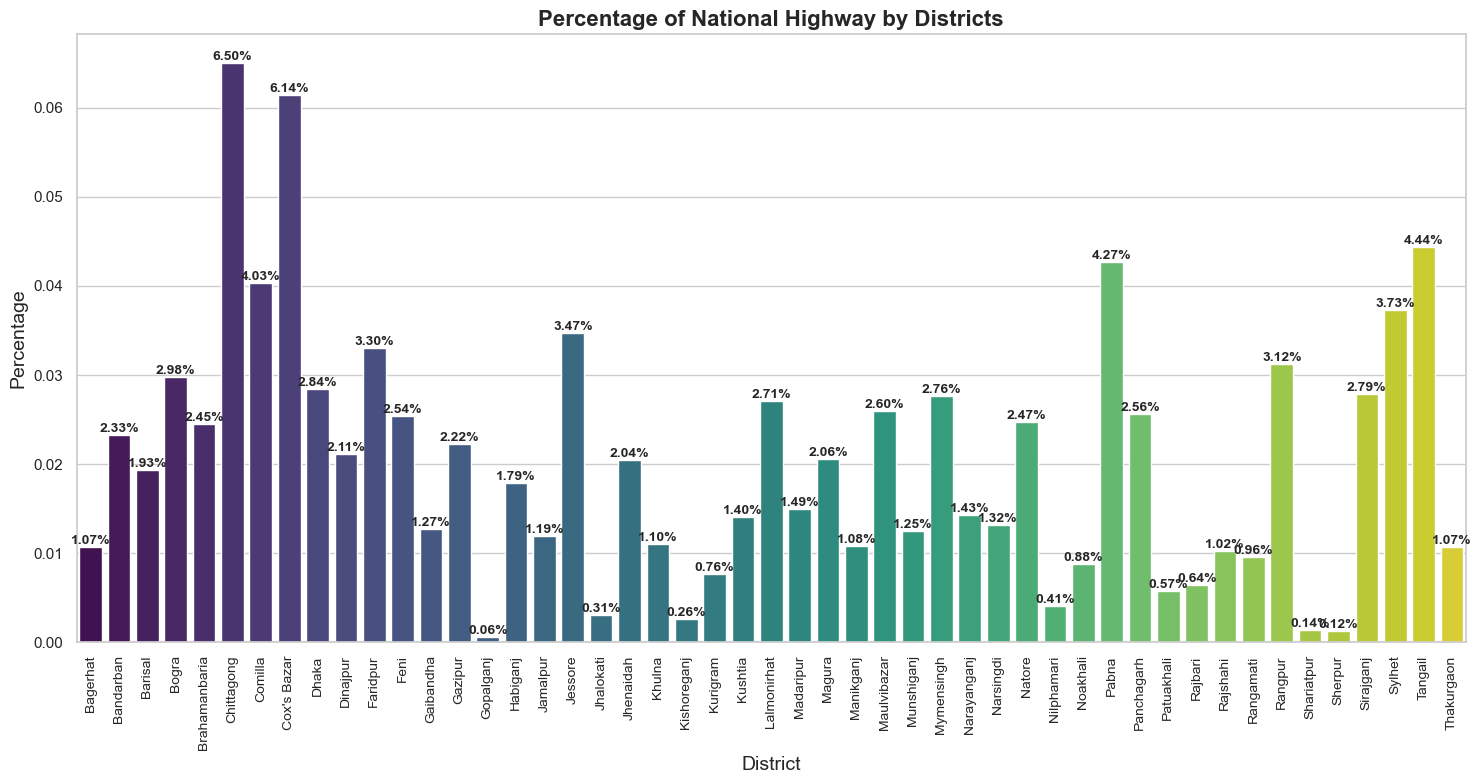

In [ ]:

sns.set_theme(style="whitegrid")

plt.figure(figsize=(15, 8))
ax = sns.barplot(data=result_df, x="District", y="Percentage", hue="District", dodge=False, palette="viridis", legend=False)


plt.title("Percentage of National Highway by Districts", fontsize=16, fontweight='bold')
plt.xlabel("District", fontsize=14)
plt.ylabel("Percentage", fontsize=14)

plt.xticks(rotation=90, fontsize=10)


for p in ax.patches:
    ax.annotate(f"{p.get_height():.2%}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
output_filename = 'road_length_by_district.csv'
output_directory=r''   # Specify your output directory here
path = os.path.join(output_directory, output_filename)
result.to_csv(path)